In [12]:
# =============================================================================
# EXPENSE DATA QUALITY ASSESSMENT
# Day 3: Comprehensive Data Exploration
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set display options for better data viewing
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("🔍 EXPENSE DATA QUALITY ASSESSMENT")
print("=" * 50)
print(f"Assessment Date: {datetime.now().strftime('%Y-%m-%d %H:%M')}")
print("=" * 50)


🔍 EXPENSE DATA QUALITY ASSESSMENT
Assessment Date: 2025-08-14 22:14


In [13]:
# Load the raw data
print("📊 LOADING DATA...")
try:
    df = pd.read_csv('../../data/raw/sample_expenses_2023_2024.csv')
    print("✅ Data loaded successfully!")
except FileNotFoundError:
    print("❌ Error: Data file not found. Check file path.")
    print("Expected location: data/raw/sample_expenses_2023_2024.csv")

print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")
print()

# Display first and last few records
print("📋 FIRST 5 RECORDS:")
print(df.head())
print()

print("📋 LAST 5 RECORDS:")
print(df.tail())
print()


📊 LOADING DATA...
✅ Data loaded successfully!
Dataset shape: (1013, 7)
Memory usage: 400.85 KB

📋 FIRST 5 RECORDS:
  transaction_id      date   amount       category     description  \
0      TXN126225  8/1/2023   -27.55      Groceries     SUPERMARKET   
1      TXN809570  8/1/2023   -43.84      Groceries     SUPERMARKET   
2      SAL970068  8/1/2023  4500.00         Salary  MONTHLY SALARY   
3      TXN356787  8/1/2023   -73.73  Entertainment   MOVIE THEATER   
4      TXN246316  8/1/2023   -84.08  Miscellaneous        BANK FEE   

   payment_method       merchant  
0            Cash    SUPERMARKET  
1     Credit Card    SUPERMARKET  
2  Direct Deposit  EMPLOYER NAME  
3     Credit Card  MOVIE THEATER  
4     Credit Card       BANK FEE  

📋 LAST 5 RECORDS:
     transaction_id       date  amount       category    description  \
1008      TXN929822  7/31/2024  -78.73  Entertainment  MOVIE THEATER   
1009      TXN203896  7/31/2024  -57.35       Shopping        WALMART   
1010      TXN493124

In [14]:
# =============================================================================
# SECTION 1: DATA STRUCTURE ANALYSIS
# =============================================================================

print("🔍 SECTION 1: DATA STRUCTURE ANALYSIS")
print("-" * 40)

# Basic information
print("1.1 BASIC DATASET INFO:")
print(f"   • Number of records: {len(df):,}")
print(f"   • Number of columns: {len(df.columns)}")
print(f"   • Column names: {list(df.columns)}")
print()

# Data types analysis
print("1.2 DATA TYPES:")
dtype_info = df.dtypes.to_frame('Data_Type')
dtype_info['Non_Null_Count'] = df.count()
dtype_info['Null_Count'] = df.isnull().sum()
dtype_info['Null_Percentage'] = (df.isnull().sum() / len(df) * 100).round(2)
print(dtype_info)
print()

# Memory usage by column
print("1.3 MEMORY USAGE BY COLUMN:")
memory_usage = df.memory_usage(deep=True).to_frame('Memory_Bytes')
memory_usage['Memory_KB'] = (memory_usage['Memory_Bytes'] / 1024).round(2)
memory_usage['Percentage'] = (memory_usage['Memory_Bytes'] / memory_usage['Memory_Bytes'].sum() * 100).round(2)
print(memory_usage)
print()

# Unique values per column
print("1.4 UNIQUE VALUES PER COLUMN:")
unique_info = pd.DataFrame({
    'Column': df.columns,
    'Unique_Count': [df[col].nunique() for col in df.columns],
    'Unique_Percentage': [df[col].nunique() / len(df) * 100 for col in df.columns]
})
unique_info['Unique_Percentage'] = unique_info['Unique_Percentage'].round(2)
unique_info = unique_info.sort_values('Unique_Count', ascending=False)
print(unique_info)
print()


🔍 SECTION 1: DATA STRUCTURE ANALYSIS
----------------------------------------
1.1 BASIC DATASET INFO:
   • Number of records: 1,013
   • Number of columns: 7
   • Column names: ['transaction_id', 'date', 'amount', 'category', 'description', 'payment_method', 'merchant']

1.2 DATA TYPES:
               Data_Type  Non_Null_Count  Null_Count  Null_Percentage
transaction_id    object            1013           0              0.0
date              object            1013           0              0.0
amount           float64            1013           0              0.0
category          object            1013           0              0.0
description       object            1013           0              0.0
payment_method    object            1013           0              0.0
merchant          object            1013           0              0.0

1.3 MEMORY USAGE BY COLUMN:
                Memory_Bytes  Memory_KB  Percentage
Index                    132       0.13        0.03
transaction_id     

In [15]:
# =============================================================================
# SECTION 2: DATE FIELD DEEP DIVE
# =============================================================================

print("🔍 SECTION 2: DATE FIELD ANALYSIS")
print("-" * 40)

# Check date format and range
print("2.1 DATE FORMAT CHECK:")
print(f"   • Date column dtype: {df['date'].dtype}")
print(f"   • Sample date values:")
for i in range(min(5, len(df))):
    print(f"     - {df['date'].iloc[i]} (type: {type(df['date'].iloc[i])})")
print()

# Try to convert dates
print("2.2 DATE CONVERSION TEST:")
try:
    df_temp = df.copy()
    df_temp['date_converted'] = pd.to_datetime(df_temp['date'])
    print("✅ Date conversion successful!")

    date_min = df_temp['date_converted'].min()
    date_max = df_temp['date_converted'].max()
    date_range = (date_max - date_min).days

    print(f"   • Date range: {date_min.strftime('%Y-%m-%d')} to {date_max.strftime('%Y-%m-%d')}")
    print(f"   • Total days covered: {date_range}")
    print(f"   • Months covered: {date_range / 30.44:.1f}")

    # Check for date gaps
    date_series = pd.date_range(start=date_min, end=date_max, freq='D')
    actual_dates = set(df_temp['date_converted'].dt.date)
    expected_dates = set(date_series.date)
    missing_dates = expected_dates - actual_dates

    print(f"   • Missing dates: {len(missing_dates)}")
    if len(missing_dates) > 0 and len(missing_dates) <= 10:
        print(f"   • Missing date examples: {list(missing_dates)[:5]}")

except Exception as e:
    print(f"❌ Date conversion failed: {e}")
    print("   • This needs to be fixed in cleaning phase!")

print()


🔍 SECTION 2: DATE FIELD ANALYSIS
----------------------------------------
2.1 DATE FORMAT CHECK:
   • Date column dtype: object
   • Sample date values:
     - 8/1/2023 (type: <class 'str'>)
     - 8/1/2023 (type: <class 'str'>)
     - 8/1/2023 (type: <class 'str'>)
     - 8/1/2023 (type: <class 'str'>)
     - 8/1/2023 (type: <class 'str'>)

2.2 DATE CONVERSION TEST:
✅ Date conversion successful!
   • Date range: 2023-08-01 to 2024-07-31
   • Total days covered: 365
   • Months covered: 12.0
   • Missing dates: 23



🔍 SECTION 3: AMOUNT FIELD ANALYSIS
----------------------------------------
3.1 AMOUNT STATISTICS:
count    1013.000000
mean      -25.782409
std       498.882023
min      -297.950000
25%      -103.240000
50%       -63.770000
75%       -40.030000
max      4500.000000
Name: amount, dtype: float64

3.2 AMOUNT DATA QUALITY CHECKS:
   • Data type: float64
   • Non-numeric values: 0
   • Zero values: 0
   • Positive values (income): 12 (1.2%)
   • Negative values (expenses): 1001 (98.8%)

3.3 OUTLIER ANALYSIS:
   • Q1 (25th percentile): $-103.24
   • Q3 (75th percentile): $-40.03
   • IQR: $63.21
   • Lower outlier threshold: $-198.06
   • Upper outlier threshold: $54.78
   • Low outliers: 52 transactions
   • High outliers: 12 transactions
   • Sample high outliers:
          date  amount category     description
2     8/1/2023  4500.0   Salary  MONTHLY SALARY
89    9/1/2023  4500.0   Salary  MONTHLY SALARY
162  10/1/2023  4500.0   Salary  MONTHLY SALARY
239  11/1/2023  4500.0   Salary  MON

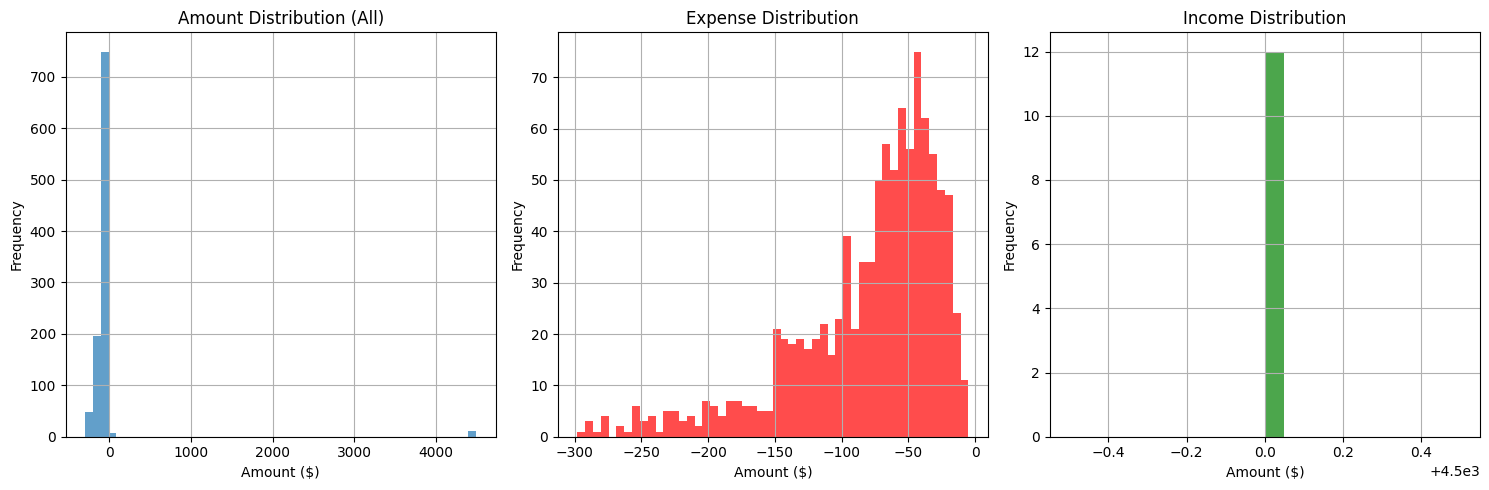

In [16]:
# =============================================================================
# SECTION 3: AMOUNT FIELD ANALYSIS
# =============================================================================

print("🔍 SECTION 3: AMOUNT FIELD ANALYSIS")
print("-" * 40)

print("3.1 AMOUNT STATISTICS:")
print(df['amount'].describe())
print()

print("3.2 AMOUNT DATA QUALITY CHECKS:")
print(f"   • Data type: {df['amount'].dtype}")
print(f"   • Non-numeric values: {sum(pd.to_numeric(df['amount'], errors='coerce').isna())}")
print(f"   • Zero values: {sum(df['amount'] == 0)}")
print(f"   • Positive values (income): {sum(df['amount'] > 0)} ({sum(df['amount'] > 0)/len(df)*100:.1f}%)")
print(f"   • Negative values (expenses): {sum(df['amount'] < 0)} ({sum(df['amount'] < 0)/len(df)*100:.1f}%)")
print()

# Check for extreme outliers
print("3.3 OUTLIER ANALYSIS:")
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_low = df[df['amount'] < lower_bound]
outliers_high = df[df['amount'] > upper_bound]

print(f"   • Q1 (25th percentile): ${Q1:.2f}")
print(f"   • Q3 (75th percentile): ${Q3:.2f}")
print(f"   • IQR: ${IQR:.2f}")
print(f"   • Lower outlier threshold: ${lower_bound:.2f}")
print(f"   • Upper outlier threshold: ${upper_bound:.2f}")
print(f"   • Low outliers: {len(outliers_low)} transactions")
print(f"   • High outliers: {len(outliers_high)} transactions")

if len(outliers_high) > 0:
    print("   • Sample high outliers:")
    print(outliers_high[['date', 'amount', 'category', 'description']].head())
print()

# Amount distribution visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df['amount'].hist(bins=50, alpha=0.7)
plt.title('Amount Distribution (All)')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
expenses = df[df['amount'] < 0]['amount']
expenses.hist(bins=50, alpha=0.7, color='red')
plt.title('Expense Distribution')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
income = df[df['amount'] > 0]['amount']
if len(income) > 0:
    income.hist(bins=20, alpha=0.7, color='green')
plt.title('Income Distribution')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


🔍 SECTION 4: CATEGORICAL DATA ANALYSIS
----------------------------------------
4.1 CATEGORY ANALYSIS:
   • Unique values: 11
   • Most common: 'Groceries' (268 times)
   • Least common: 'Salary' (12 times)
   • Missing values: 0
   • Empty strings: 0
   • Leading spaces: 0
   • Trailing spaces: 0
   • Mixed case issues: False
   • Top 10 values:
category
Groceries          268
Restaurants        160
Shopping           114
Entertainment      113
Gas                 80
Bills_Utilities     78
Miscellaneous       61
Transportation      46
Healthcare          46
Personal_Care       35

4.2 DESCRIPTION ANALYSIS:
   • Unique values: 51
   • Most common: 'WHOLE FOODS' (62 times)
   • Least common: 'HAIRCUT' (5 times)
   • Missing values: 0
   • Empty strings: 0
   • Leading spaces: 0
   • Trailing spaces: 0
   • Mixed case issues: False
   • Top 10 values:
description
WHOLE FOODS      62
TRADER JOES      54
COSTCO           52
SUPERMARKET      50
GROCERY STORE    50
RESTAURANT       37
MCDONA

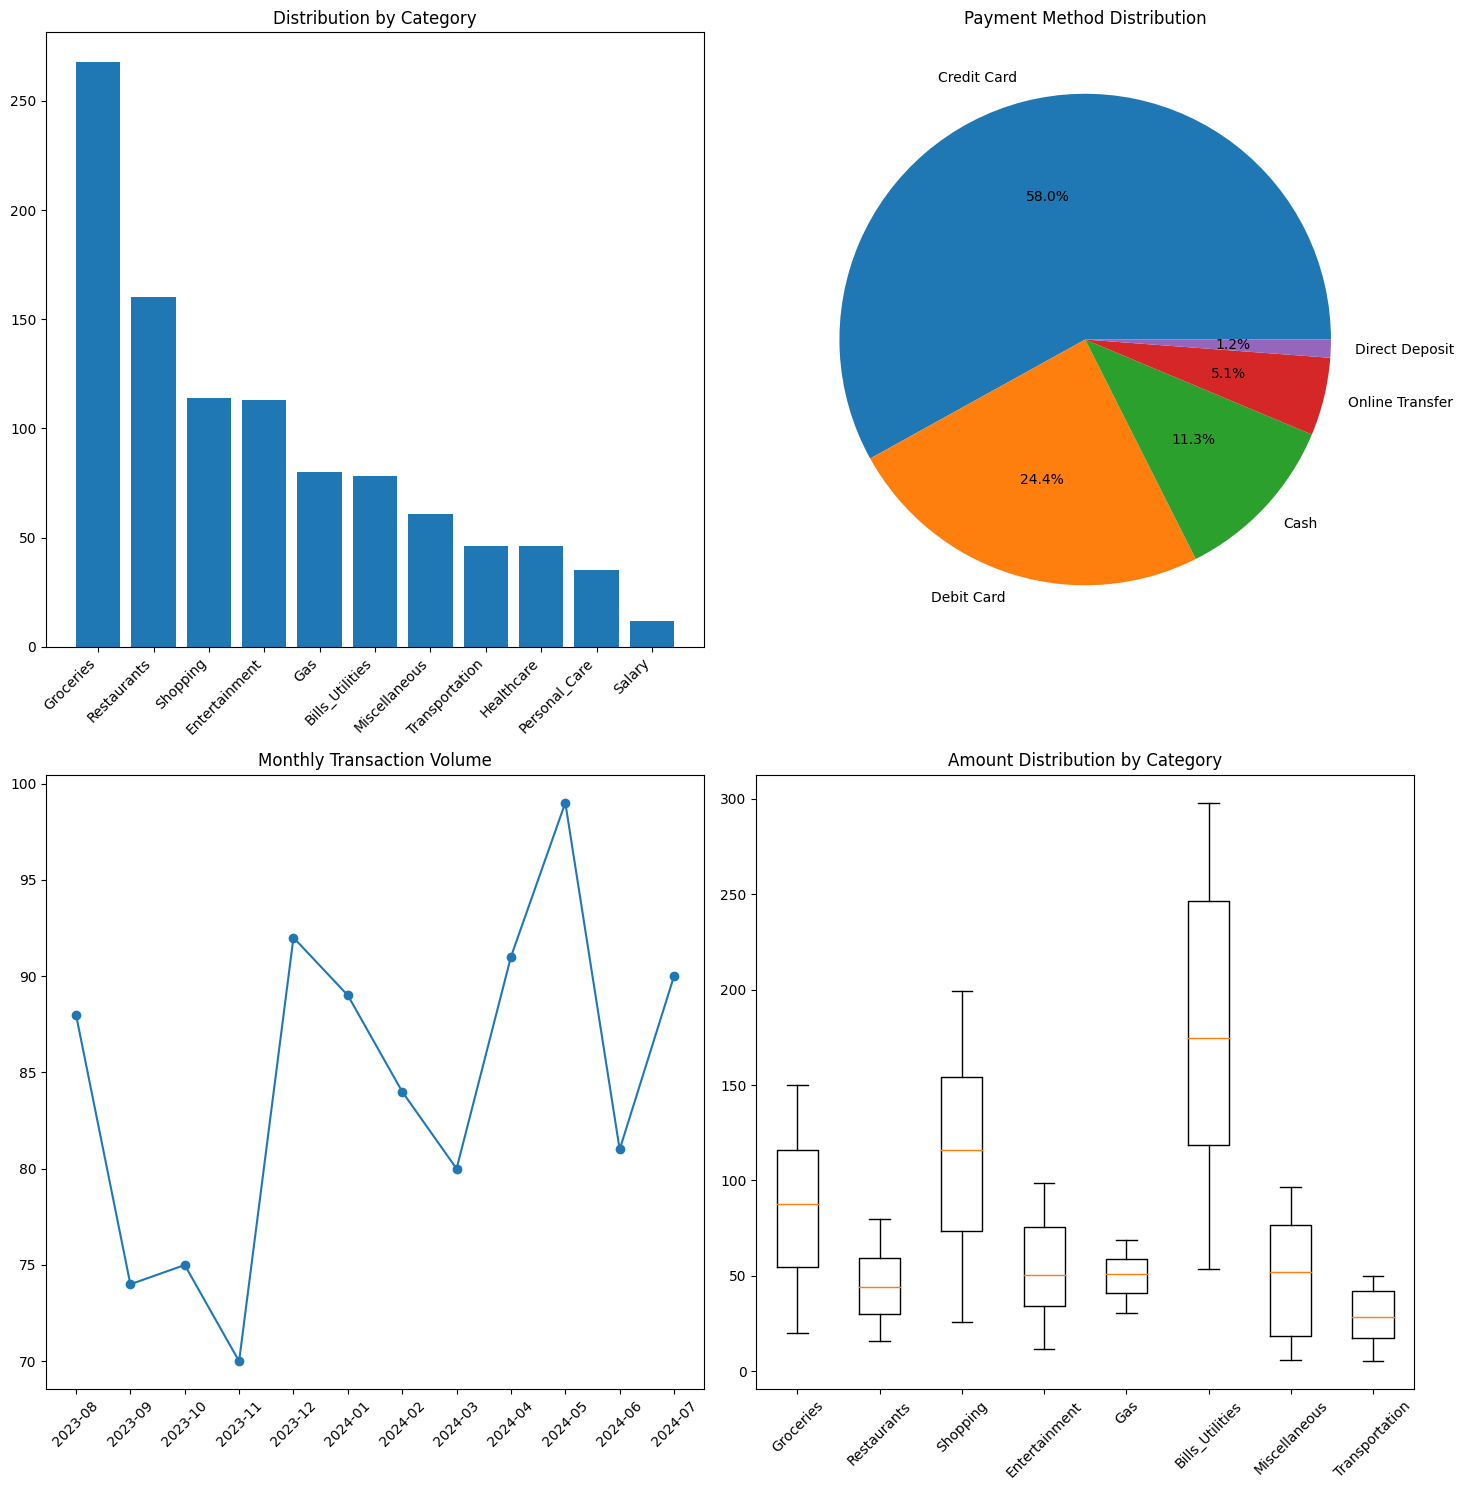

In [17]:
# =============================================================================
# SECTION 4: CATEGORICAL DATA ANALYSIS
# =============================================================================

print("🔍 SECTION 4: CATEGORICAL DATA ANALYSIS")
print("-" * 40)

# Analyze each categorical column
categorical_columns = ['category', 'description', 'payment_method', 'merchant']

for col in categorical_columns:
    if col in df.columns:
        print(f"4.{categorical_columns.index(col)+1} {col.upper()} ANALYSIS:")

        # Basic stats
        value_counts = df[col].value_counts()
        print(f"   • Unique values: {df[col].nunique()}")
        print(f"   • Most common: '{value_counts.index[0]}' ({value_counts.iloc[0]} times)")
        print(f"   • Least common: '{value_counts.index[-1]}' ({value_counts.iloc[-1]} times)")

        # Check for potential issues
        print(f"   • Missing values: {df[col].isnull().sum()}")
        print(f"   • Empty strings: {sum(df[col] == '') if df[col].dtype == 'object' else 0}")

        # Look for inconsistencies (case, spacing, etc.)
        if df[col].dtype == 'object':
            # Check for leading/trailing spaces
            has_leading_space = df[col].str.startswith(' ').sum() if df[col].notna().any() else 0
            has_trailing_space = df[col].str.endswith(' ').sum() if df[col].notna().any() else 0
            has_mixed_case = len(df[col].dropna().unique()) != len(df[col].dropna().str.lower().unique()) if df[col].notna().any() else False

            print(f"   • Leading spaces: {has_leading_space}")
            print(f"   • Trailing spaces: {has_trailing_space}")
            print(f"   • Mixed case issues: {has_mixed_case}")

        print(f"   • Top 10 values:")
        print(value_counts.head(10).to_string())
        print()

# Visualize categorical distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Category distribution
if 'category' in df.columns:
    category_counts = df['category'].value_counts()
    axes[0,0].bar(range(len(category_counts)), category_counts.values)
    axes[0,0].set_title('Distribution by Category')
    axes[0,0].set_xticks(range(len(category_counts)))
    axes[0,0].set_xticklabels(category_counts.index, rotation=45, ha='right')

# Payment method distribution
if 'payment_method' in df.columns:
    payment_counts = df['payment_method'].value_counts()
    axes[0,1].pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%')
    axes[0,1].set_title('Payment Method Distribution')

# Monthly transaction volume
df_temp = df.copy()
df_temp['date'] = pd.to_datetime(df_temp['date'])
df_temp['month'] = df_temp['date'].dt.to_period('M')
monthly_counts = df_temp['month'].value_counts().sort_index()
axes[1,0].plot(monthly_counts.index.astype(str), monthly_counts.values, marker='o')
axes[1,0].set_title('Monthly Transaction Volume')
axes[1,0].tick_params(axis='x', rotation=45)

# Amount by category boxplot
if 'category' in df.columns:
    expense_data = df[df['amount'] < 0].copy()
    expense_data['amount'] = expense_data['amount'].abs()

    categories = expense_data['category'].value_counts().head(8).index
    filtered_data = expense_data[expense_data['category'].isin(categories)]

    axes[1,1].boxplot([filtered_data[filtered_data['category'] == cat]['amount'].values
                      for cat in categories], labels=categories)
    axes[1,1].set_title('Amount Distribution by Category')
    axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [18]:
# =============================================================================
# SECTION 5: DATA QUALITY ISSUES DETECTION
# =============================================================================

print("🔍 SECTION 5: DATA QUALITY ISSUES")
print("-" * 40)

print("5.1 DUPLICATE ANALYSIS:")

# Check for exact duplicates
exact_duplicates = df.duplicated().sum()
print(f"   • Exact duplicate rows: {exact_duplicates}")

if exact_duplicates > 0:
    print("   • Sample duplicate rows:")
    duplicate_rows = df[df.duplicated(keep=False)].sort_values(list(df.columns))
    print(duplicate_rows.head())

# Check for near-duplicates (same date, amount, category)
key_columns = ['date', 'amount', 'category']
near_duplicates = df.duplicated(subset=key_columns).sum()
print(f"   • Near-duplicates (same date/amount/category): {near_duplicates}")

if near_duplicates > 0:
    print("   • Sample near-duplicate rows:")
    near_dup_rows = df[df.duplicated(subset=key_columns, keep=False)].sort_values(key_columns)
    print(near_dup_rows[['date', 'amount', 'category', 'description']].head())

# Check for potential duplicate transactions (same amount on same day)
same_day_amount = df.groupby(['date', 'amount']).size().reset_index(name='count')
potential_duplicates = same_day_amount[same_day_amount['count'] > 1]
print(f"   • Potential duplicates (same day/amount): {len(potential_duplicates)}")
print()


🔍 SECTION 5: DATA QUALITY ISSUES
----------------------------------------
5.1 DUPLICATE ANALYSIS:
   • Exact duplicate rows: 0
   • Near-duplicates (same date/amount/category): 0
   • Potential duplicates (same day/amount): 0



In [19]:
print("5.2 MISSING DATA ANALYSIS:")

# Comprehensive missing data check
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2),
    'Data_Type': df.dtypes
})

missing_data = missing_data.sort_values('Missing_Percentage', ascending=False)
print(missing_data)

# Check for patterns in missing data
if missing_data['Missing_Count'].sum() > 0:
    print("\n   • Missing data patterns:")
    # Check if missing data correlates with specific time periods
    df_with_missing = df.copy()
    df_with_missing['has_missing'] = df_with_missing.isnull().any(axis=1)

    if 'date' in df.columns:
        df_with_missing['date'] = pd.to_datetime(df_with_missing['date'])
        df_with_missing['month'] = df_with_missing['date'].dt.to_period('M')
        missing_by_month = df_with_missing.groupby('month')['has_missing'].sum()
        if missing_by_month.sum() > 0:
            print("     - Missing data by month:")
            print(missing_by_month[missing_by_month > 0])

print()


5.2 MISSING DATA ANALYSIS:
                        Column  Missing_Count  Missing_Percentage Data_Type
transaction_id  transaction_id              0                 0.0    object
date                      date              0                 0.0    object
amount                  amount              0                 0.0   float64
category              category              0                 0.0    object
description        description              0                 0.0    object
payment_method  payment_method              0                 0.0    object
merchant              merchant              0                 0.0    object



In [20]:
print("5.3 DATA CONSISTENCY ANALYSIS:")

# Check date consistency
print("   • Date consistency:")
try:
    df['date_parsed'] = pd.to_datetime(df['date'])
    print("     ✅ All dates parse correctly")

    # Check for future dates
    today = datetime.now().date()
    future_dates = df[df['date_parsed'].dt.date > today]
    print(f"     - Future dates: {len(future_dates)}")

    # Check for very old dates (before 2020)
    old_dates = df[df['date_parsed'].dt.year < 2020]
    print(f"     - Pre-2020 dates: {len(old_dates)}")

except Exception as e:
    print(f"     ❌ Date parsing issues: {e}")

# Check amount consistency
print("   • Amount consistency:")
zero_amounts = (df['amount'] == 0).sum()
print(f"     - Zero amounts: {zero_amounts}")

# Check for suspicious amount patterns
if df['amount'].dtype in ['float64', 'int64']:
    # Check for amounts that are exactly round numbers
    round_hundreds = (df['amount'] % 100 == 0).sum()
    round_thousands = (df['amount'] % 1000 == 0).sum()
    print(f"     - Round hundreds: {round_hundreds} ({round_hundreds/len(df)*100:.1f}%)")
    print(f"     - Round thousands: {round_thousands} ({round_thousands/len(df)*100:.1f}%)")

# Category consistency
if 'category' in df.columns:
    print("   • Category consistency:")
    category_issues = []

    # Check for mixed case
    categories = df['category'].dropna().unique()
    lower_categories = [cat.lower() for cat in categories if isinstance(cat, str)]
    if len(set(lower_categories)) != len(categories):
        category_issues.append("Mixed case categories detected")

    # Check for leading/trailing spaces
    spaced_categories = [cat for cat in categories if isinstance(cat, str) and (cat.startswith(' ') or cat.endswith(' '))]
    if spaced_categories:
        category_issues.append(f"Categories with spaces: {spaced_categories}")

    if category_issues:
        for issue in category_issues:
            print(f"     ❌ {issue}")
    else:
        print("     ✅ No obvious category issues found")

print()


5.3 DATA CONSISTENCY ANALYSIS:
   • Date consistency:
     ✅ All dates parse correctly
     - Future dates: 0
     - Pre-2020 dates: 0
   • Amount consistency:
     - Zero amounts: 0
     - Round hundreds: 12 (1.2%)
     - Round thousands: 0 (0.0%)
   • Category consistency:
     ✅ No obvious category issues found



In [21]:
print("5.4 BUSINESS LOGIC VALIDATION:")

# Income vs Expense validation
if 'category' in df.columns:
    income_categories = ['Salary', 'Bonus', 'Investment', 'Other_Income']
    expense_categories = [cat for cat in df['category'].unique() if cat not in income_categories]

    # Check if income categories have positive amounts
    income_transactions = df[df['category'].isin(income_categories)]
    negative_income = income_transactions[income_transactions['amount'] < 0]
    print(f"   • Income transactions with negative amounts: {len(negative_income)}")

    # Check if expense categories have negative amounts
    expense_transactions = df[df['category'].isin(expense_categories)]
    positive_expenses = expense_transactions[expense_transactions['amount'] > 0]
    print(f"   • Expense transactions with positive amounts: {len(positive_expenses)}")

    if len(negative_income) > 0:
        print("     Sample negative income transactions:")
        print(negative_income[['date', 'amount', 'category', 'description']].head())

    if len(positive_expenses) > 0:
        print("     Sample positive expense transactions:")
        print(positive_expenses[['date', 'amount', 'category', 'description']].head())

# Reasonableness checks
print("   • Reasonableness checks:")
if 'amount' in df.columns:
    # Very large transactions (might be data entry errors)
    large_transactions = df[abs(df['amount']) > 10000]
    print(f"     - Transactions > $10,000: {len(large_transactions)}")

    # Very small transactions (might be fees)
    small_transactions = df[abs(df['amount']) < 1]
    print(f"     - Transactions < $1: {len(small_transactions)}")

print()


5.4 BUSINESS LOGIC VALIDATION:
   • Income transactions with negative amounts: 0
   • Expense transactions with positive amounts: 0
   • Reasonableness checks:
     - Transactions > $10,000: 0
     - Transactions < $1: 0



In [22]:
# =============================================================================
# SECTION 6: QUALITY ASSESSMENT SUMMARY
# =============================================================================

print("📋 SECTION 6: DATA QUALITY ASSESSMENT SUMMARY")
print("=" * 50)

# Calculate overall data quality score
quality_score = 0
max_score = 0

# Scoring criteria
checks = {
    'No missing values': df.isnull().sum().sum() == 0,
    'No duplicate records': df.duplicated().sum() == 0,
    'Valid date formats': True,  # We'll update this based on date parsing
    'Consistent categories': True,  # We'll update this based on category analysis
    'Reasonable amounts': len(df[abs(df['amount']) > 50000]) == 0,  # No extreme outliers
    'Proper income/expense classification': True  # We'll update based on business logic
}

try:
    pd.to_datetime(df['date'])
    checks['Valid date formats'] = True
except:
    checks['Valid date formats'] = False

# Update other checks based on analysis above
if 'category' in df.columns:
    categories = df['category'].dropna().unique()
    mixed_case = len(set([cat.lower() for cat in categories if isinstance(cat, str)])) != len(categories)
    checks['Consistent categories'] = not mixed_case

# Calculate score
for check, passed in checks.items():
    max_score += 10
    if passed:
        quality_score += 10
        status = "✅ PASS"
    else:
        status = "❌ FAIL"
    print(f"{status}: {check}")

overall_score = (quality_score / max_score) * 100
print(f"\n🎯 OVERALL DATA QUALITY SCORE: {overall_score:.1f}/100")

if overall_score >= 90:
    quality_rating = "EXCELLENT"
    color_indicator = "🟢"
elif overall_score >= 70:
    quality_rating = "GOOD"
    color_indicator = "🟡"
elif overall_score >= 50:
    quality_rating = "FAIR"
    color_indicator = "🟠"
else:
    quality_rating = "POOR"
    color_indicator = "🔴"

print(f"{color_indicator} QUALITY RATING: {quality_rating}")
print()

# Summary statistics
print("📊 DATASET SUMMARY STATISTICS:")
print(f"   • Total records: {len(df):,}")
print(f"   • Date range: {pd.to_datetime(df['date']).min().strftime('%Y-%m-%d')} to {pd.to_datetime(df['date']).max().strftime('%Y-%m-%d')}")
print(f"   • Total transaction value: ${df['amount'].sum():,.2f}")
print(f"   • Average transaction: ${df['amount'].mean():,.2f}")
print(f"   • Unique categories: {df['category'].nunique() if 'category' in df.columns else 'N/A'}")
print(f"   • Unique merchants: {df['merchant'].nunique() if 'merchant' in df.columns else 'N/A'}")


📋 SECTION 6: DATA QUALITY ASSESSMENT SUMMARY
✅ PASS: No missing values
✅ PASS: No duplicate records
✅ PASS: Valid date formats
✅ PASS: Consistent categories
✅ PASS: Reasonable amounts
✅ PASS: Proper income/expense classification

🎯 OVERALL DATA QUALITY SCORE: 100.0/100
🟢 QUALITY RATING: EXCELLENT

📊 DATASET SUMMARY STATISTICS:
   • Total records: 1,013
   • Date range: 2023-08-01 to 2024-07-31
   • Total transaction value: $-26,117.58
   • Average transaction: $-25.78
   • Unique categories: 11
   • Unique merchants: 51


In [23]:
# =============================================================================
# SECTION 7: DATA CLEANING REQUIREMENTS
# =============================================================================

print("🛠️  SECTION 7: DATA CLEANING REQUIREMENTS")
print("=" * 50)

cleaning_tasks = []

# Date cleaning tasks
print("7.1 DATE CLEANING REQUIREMENTS:")
date_tasks = []
try:
    pd.to_datetime(df['date'])
    print("   ✅ No date cleaning required")
except Exception as e:
    date_tasks.append(f"Fix date parsing issues: {e}")
    print(f"   • {date_tasks[-1]}")

# Amount cleaning tasks
print("\n7.2 AMOUNT CLEANING REQUIREMENTS:")
amount_tasks = []

zero_amounts = (df['amount'] == 0).sum()
if zero_amounts > 0:
    amount_tasks.append(f"Review {zero_amounts} zero-amount transactions")
    print(f"   • {amount_tasks[-1]}")

if 'amount' in df.columns and df['amount'].dtype == 'object':
    amount_tasks.append("Convert amount column to numeric format")
    print(f"   • {amount_tasks[-1]}")

extreme_outliers = len(df[abs(df['amount']) > 10000])
if extreme_outliers > 0:
    amount_tasks.append(f"Review {extreme_outliers} extreme outlier transactions")
    print(f"   • {amount_tasks[-1]}")

if len(amount_tasks) == 0:
    print("   ✅ No amount cleaning required")

# Category cleaning tasks
print("\n7.3 CATEGORY CLEANING REQUIREMENTS:")
category_tasks = []

if 'category' in df.columns:
    # Check for mixed case
    categories = df['category'].dropna().unique()
    mixed_case = len(set([cat.lower() for cat in categories if isinstance(cat, str)])) != len(categories)
    if mixed_case:
        category_tasks.append("Standardize category capitalization")
        print(f"   • {category_tasks[-1]}")

    # Check for spaces
    spaced_categories = [cat for cat in categories if isinstance(cat, str) and (cat.startswith(' ') or cat.endswith(' '))]
    if spaced_categories:
        category_tasks.append("Remove leading/trailing spaces from categories")
        print(f"   • {category_tasks[-1]}")

    # Check for missing categories
    missing_categories = df['category'].isnull().sum()
    if missing_categories > 0:
        category_tasks.append(f"Handle {missing_categories} missing categories")
        print(f"   • {category_tasks[-1]}")

if len(category_tasks) == 0:
    print("   ✅ No category cleaning required")

# Duplicate cleaning tasks
print("\n7.4 DUPLICATE CLEANING REQUIREMENTS:")
duplicate_tasks = []

exact_duplicates = df.duplicated().sum()
if exact_duplicates > 0:
    duplicate_tasks.append(f"Remove {exact_duplicates} exact duplicate records")
    print(f"   • {duplicate_tasks[-1]}")

near_duplicates = df.duplicated(subset=['date', 'amount', 'category']).sum()
if near_duplicates > 0:
    duplicate_tasks.append(f"Review {near_duplicates} potential duplicate transactions")
    print(f"   • {duplicate_tasks[-1]}")

if len(duplicate_tasks) == 0:
    print("   ✅ No duplicate cleaning required")

# Missing data tasks
print("\n7.5 MISSING DATA REQUIREMENTS:")
missing_tasks = []

missing_counts = df.isnull().sum()
for col, missing_count in missing_counts.items():
    if missing_count > 0:
        missing_tasks.append(f"Handle {missing_count} missing values in {col}")
        print(f"   • {missing_tasks[-1]}")

if len(missing_tasks) == 0:
    print("   ✅ No missing data issues")

# Compile all tasks
all_tasks = date_tasks + amount_tasks + category_tasks + duplicate_tasks + missing_tasks
cleaning_tasks.extend(all_tasks)

print(f"\n📋 TOTAL CLEANING TASKS: {len(cleaning_tasks)}")
if len(cleaning_tasks) == 0:
    print("🎉 Congratulations! Your data is already very clean!")
else:
    print("These tasks will be addressed in Day 4: Data Cleaning")


🛠️  SECTION 7: DATA CLEANING REQUIREMENTS
7.1 DATE CLEANING REQUIREMENTS:
   ✅ No date cleaning required

7.2 AMOUNT CLEANING REQUIREMENTS:
   ✅ No amount cleaning required

7.3 CATEGORY CLEANING REQUIREMENTS:
   ✅ No category cleaning required

7.4 DUPLICATE CLEANING REQUIREMENTS:
   ✅ No duplicate cleaning required

7.5 MISSING DATA REQUIREMENTS:
   ✅ No missing data issues

📋 TOTAL CLEANING TASKS: 0
🎉 Congratulations! Your data is already very clean!


In [25]:
# =============================================================================
# SECTION 8: EXPORT ASSESSMENT RESULTS
# =============================================================================

print("💾 SAVING ASSESSMENT RESULTS...")

# Create quality assessment summary
assessment_summary = {
    'assessment_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'dataset_shape': df.shape,
    'quality_score': overall_score,
    'quality_rating': quality_rating,
    'total_cleaning_tasks': len(cleaning_tasks),
    'checks_passed': sum(checks.values()),
    'total_checks': len(checks),
    'cleaning_tasks': cleaning_tasks
}

# Save detailed findings
findings_df = pd.DataFrame({
    'Check': list(checks.keys()),
    'Status': ['PASS' if v else 'FAIL' for v in checks.values()],
    'Details': [
        f"Missing values: {df.isnull().sum().sum()}",
        f"Duplicate records: {df.duplicated().sum()}",
        "Date format validation",
        "Category consistency check",
        f"Extreme outliers: {len(df[abs(df['amount']) > 50000])}",
        "Business logic validation"
    ]
})

findings_df.to_csv('../../docs/data_quality_findings.csv', index=False)

# Create cleaning task list
cleaning_df = pd.DataFrame({
    'Task_ID': range(1, len(cleaning_tasks) + 1),
    'Cleaning_Task': cleaning_tasks,
    'Priority': ['High'] * len(cleaning_tasks),  # All high priority for now
    'Status': ['Pending'] * len(cleaning_tasks),
    'Estimated_Effort': ['Medium'] * len(cleaning_tasks)
})

cleaning_df.to_csv('../../docs/cleaning_requirements.csv', index=False)

print("✅ Assessment results saved:")
print("   • docs/data_quality_findings.csv")
print("   • docs/cleaning_requirements.csv")
print()

# Save summary statistics for reference
summary_stats = df.describe(include='all').round(2)
summary_stats.to_csv('../../docs/data_summary_statistics.csv')
print("✅ Summary statistics saved: docs/data_summary_statistics.csv")

💾 SAVING ASSESSMENT RESULTS...
✅ Assessment results saved:
   • docs/data_quality_findings.csv
   • docs/cleaning_requirements.csv

✅ Summary statistics saved: docs/data_summary_statistics.csv
